MTCNN Loading successful
Extracting Faces......
5 Images found
Faces Extracted Successfully
Success


person1


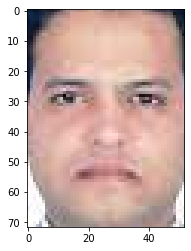

person2


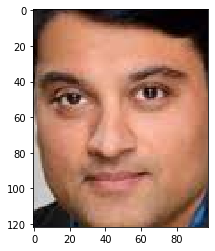

person3


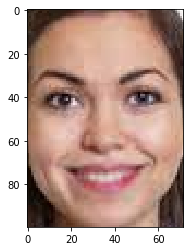

person4


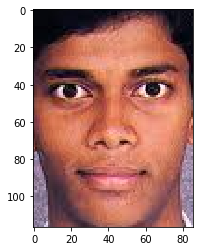

person5


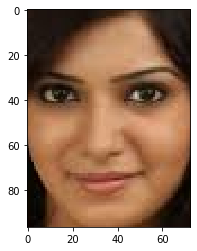

In [23]:
"""
ImagePreprocessing (Module)
Method- Face Extraction 

Image preprocessing is the module which is suppose to fetch the images from good images
and Extract face from images using MTCNN and append into list called faces 
Extract name from the images name and append into list called names 

Input : path of current working directory 
Output: Extract faces and names from images append into respective list 

"""

#Module Declaration#
#------------------#
import cv2
from mtcnn import MTCNN
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
#------------------------------------#

"""
This code  fetches the images from good images in a list called images 
and fetch the file name in a list called names.

"""
class Image_Processing:
    def __init__(self):
        
        """
        This is initialization function. This function is constructor.
        All the necessay variables are assigned in this function
        
        """
        #creating object of mtcnn model
        #blank list to store faces
        self.faces = []
        #blank list to store names
        self.names = [] 
        #loading the mtcnn model
        self.mtcnn_model = MTCNN()
        
        print("MTCNN Loading successful")
        
    def face_extractor(self,images):
        """
        This method extracts the faces using MTCNN 
        
        input:path of current working directory
        output:Image list which contains all the faces and name list which contains names 
        of the person.
        
        :param images: path of images
        :return: array of face extract images 
        
        
        """
        print("Extracting Faces......")
        #intializing faces list
        try: #listing the images paths
            images = os.listdir(images) 
            #print the number of images
            print(len(images),"Images found")  
            #Extract faces from images
            for image in images:
                #give the path of images
                imagepath = os.path.join(os.getcwd()+'\\' ,image) 
                #reading the image
                img = cv2.imread(imagepath)  
                #covert images into RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                #extracting face from image
                result = self.mtcnn_model.detect_faces(img)
                #getting dimensions from mtcnn result
                dimensions = result[0]["box"]                   
                x1, y1, width, height = dimensions
                x2, y2 = x1 + width, y1 + height
                #cropping the image using the coordinates
                img = img[y1:y2, x1:x2]
                #appending the face extracted to a list
                self.faces.append(img) 
                #appending it's name to a list
                self.names.append(image[:-4])      
            print("Faces Extracted Successfully")
            #returning the faces and names
            return self.faces,self.names  
        #Exception Handling
        except Exception as e:
            print("Error at: "+str(self.__class__.__name__))
            print()
            print('Error on line {}'.format(sys.exc_info()[-1].tb_lineno))
            print(type(e).__name__, e)

    
try:
    #creating Image_Processing object
    imageprocessor = Image_Processing()
    #calling face_extractor function
    faces,names = imageprocessor.face_extractor('E:\\PYTHON NOTES\\ineuron\\images')
    print("Success")
    print('\n')
    
except Exception as  e:
    print('Error on line {}'.format(sys.exc_info()[-1].tb_lineno))
    print(type(e).__name__, e)
    print("Image processing Failed")      
    
    
#Plotting Extracted Faces
for i in range(len(faces)):
    #print the name of person
    print(names[i]) 
    plt.imshow(faces[i]) 
    #disply images
    plt.show()
    
